In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv('movies.csv', low_memory=False)
df.info()
sn.boxplot(df4.revenue).set_title('Box Plot ~ Dealing with outliers')
plt.show()
#before outliers

df3 = df[(df.vote_average >= 8.5) & (df.revenue >= 10000000)]               
sn.boxplot(df3.revenue).set_title('Box Plot1  ~ Dealing with outliers')
plt.show()

# Calculate the IQR for the revenue column
q1 = df['revenue'].quantile(0.25)
q3 = df['revenue'].quantile(0.75)
iqr = q3 - q1

# Filter the data to only include rows with revenue within 1.5 times the IQR of the median
median = df3['revenue'].median()
df4 = df3[(df3['revenue'] >= median - 1.5 * iqr) & (df3['revenue'] <= median + 1.5 * iqr)]

# Check the new shape of the DataFrame to see how many rows were removed
sn.boxplot(df4.revenue).set_title('Box Plot ~ Dealing with outliers')
plt.show()

C:\Users\adhir\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


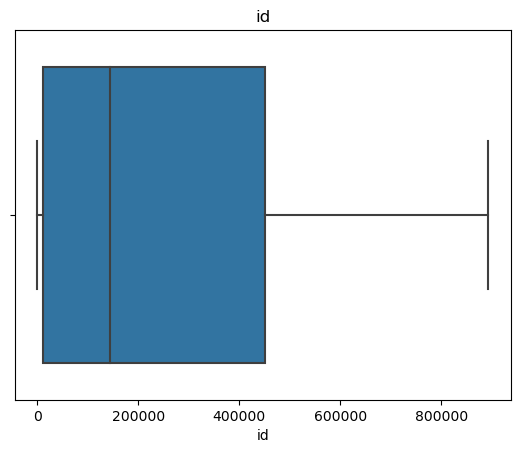

C:\Users\adhir\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


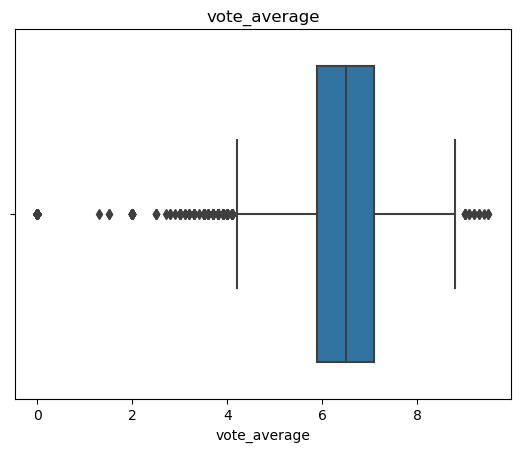

C:\Users\adhir\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


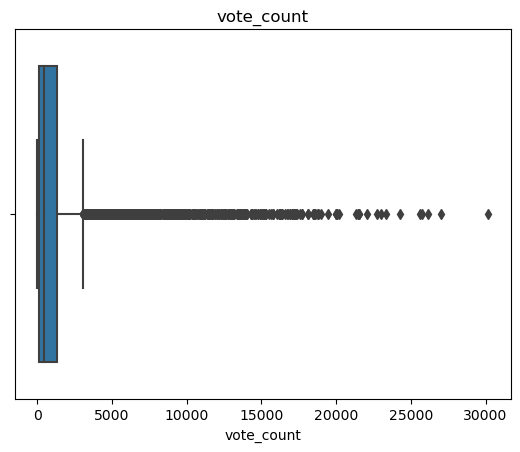

C:\Users\adhir\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


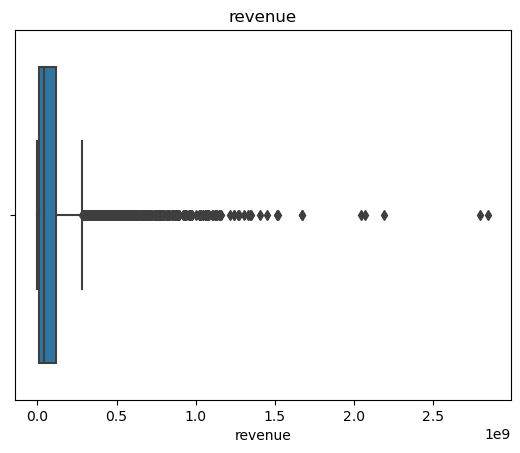

C:\Users\adhir\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


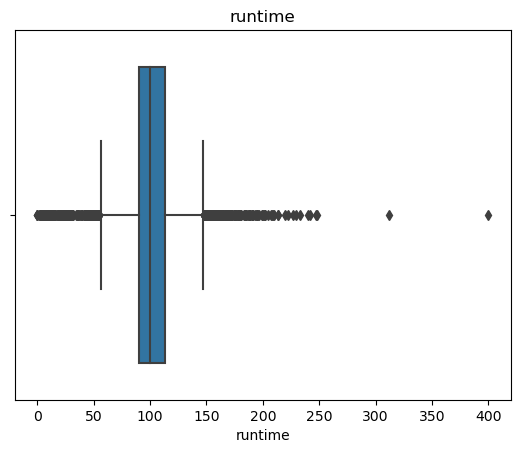

In [4]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv('movies.csv', low_memory=False)
sn.boxplot(df.id).set_title('id')
plt.show()

sn.boxplot(df.vote_average).set_title('vote_average')
plt.show()

sn.boxplot(df.vote_count).set_title('vote_count')
plt.show()

sn.boxplot(df.revenue).set_title('revenue')
plt.show()

sn.boxplot(df.runtime).set_title('runtime')
plt.show()



In [ ]:
# Filter out rows where runtime is less than 10
df.loc[df['runtime'] >= 10 , 'runtime'] = None
df.loc[df['revenue'] < 10000, 'revenue'] = None

# Calculate the mean of the runtime column
mean_runtime = df['runtime'].mean()
mean_rev = df['revenue'].mean()

# Fill any missing values in the runtime column with the mean
df['runtime'] = df['runtime'].fillna(mean_runtime)
df['revenue'] = df['revenue'].fillna(mean_rev)

# Convert revenue to thousands
df['revenue'] = df['revenue'] /10000

# Reset the index of the DataFrame for safer side
# df = df.reset_index(drop=True)

# Create a horizontal bar chart with revenue on the x-axis and runtime on the y-axis
plt.bar(df['runtime'], df['revenue'])

# Set the x-label and y-label of the plot
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue (thousands)')

# Show the plot
plt.show()

In [ ]:
#density distribution chart of different columns

# Filter out null values from the "vote_count" column
df_filtered = df.dropna(subset=['vote_count'])

# Create a density distribution chart using Seaborn
sn.kdeplot(df_filtered['vote_count'], shade=True)

# Set the x-label and y-label of the plot
plt.xlabel('Vote Count')
plt.ylabel('Density')

# Show the plot
df.vote_count.plot(kind='kde')
plt.show()


In [ ]:
#before outliers

df3 = df[(df.vote_average >= 8.5) & (df.revenue >= 10000000)]               
sn.boxplot(df3.revenue).set_title('Box Plot1  ~ Dealing with outliers')
plt.show()

# Calculate the IQR for the revenue column
q1 = df['revenue'].quantile(0.25)
q3 = df['revenue'].quantile(0.75)
iqr = q3 - q1

# Filter the data to only include rows with revenue within 1.5 times the IQR of the median
median = df3['revenue'].median()
df4 = df3[(df3['revenue'] >= median - 1.5 * iqr) & (df3['revenue'] <= median + 1.5 * iqr)]

# Check the new shape of the DataFrame to see how many rows were removed
sn.boxplot(df4.revenue).set_title('Box Plot ~ Dealing with outliers')
plt.show()


In [ ]:
df['release_date'] = pd.to_datetime(df.release_date) # adds to df as datetime type
print(df.release_date.head(2))
print(df.release_date.dt.year.head(2)) # returns lastSaleDate2 as year format 
print(df.release_date.dt.month.head(2)) # returns lastSaleDate2 as month format
print(df.release_date.dt.week.head(2)) # returns lastSaleDate2 as week format 
print(df.release_date.dt.day.head(2)) # returns lastSaleDate2 as day format 
print(df.release_date.dt.dayofweek.head(2)) # returns as dayofweek format

In [ ]:
df2 = df.drop_duplicates()

# for col in df2.columns:
#     print(f"Unique values in {col}:")
#     print(df[col].unique())
#     print()
    
# Identify int64 and float64 variables
int_vars = df.select_dtypes(include=['int64']).columns
float_vars = df.select_dtypes(include=['float64']).columns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Replace missing values with column mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
#verifying if there is no null values in any columns
print(df.isnull().sum())


In [ ]:
# Choose features to cluster
X = df[['revenue', 'vote_count']].values

# Choose number of clusters
k = 5

# Train KMeans model
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to DataFrame
df['cluster'] = labels

# Plot clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(k):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['revenue'], cluster_data['vote_count'], c=colors[i])
plt.xlabel('revenue')
plt.ylabel('Vote Count')
plt.show()

In [ ]:
# Drop rows with missing values
data = df.dropna()

# Select the columns to cluster on
X = data[['vote_average', 'vote_count']]

# Apply K-Means algorithm with 9 clusters
kmeans = KMeans(n_clusters=9, random_state=42).fit(X)

# Add cluster labels to the data
data['cluster'] = kmeans.labels_

# Visualize the clusters using a scatter plot
plt.scatter(data['vote_average'], data['vote_count'], c=data['cluster'])
plt.xlabel('Vote Average')
plt.ylabel('vote_count')
plt.show()

In [ ]:
# Filter data for movies with runtime > 100
df_filtered = df[df['runtime'] > 100]

# Create scatter plot
plt.scatter(df_filtered['vote_average'], df_filtered['vote_count'])
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.show()